# Important Libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

from wordcloud import WordCloud
import os

# Reading & Exploring Data

In [2]:
data = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='latin1')

In [3]:
data.head

<bound method NDFrame.head of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  

In [4]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
data.v1

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [6]:
data.v2

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [7]:
data['Unnamed: 2']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
5567    NaN
5568    NaN
5569    NaN
5570    NaN
5571    NaN
Name: Unnamed: 2, Length: 5572, dtype: object

In [8]:
data['Unnamed: 3']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
5567    NaN
5568    NaN
5569    NaN
5570    NaN
5571    NaN
Name: Unnamed: 3, Length: 5572, dtype: object

In [9]:
data['Unnamed: 4']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
5567    NaN
5568    NaN
5569    NaN
5570    NaN
5571    NaN
Name: Unnamed: 4, Length: 5572, dtype: object

# Simple Preprocessing

In [10]:
# Renaming the important columns to be more understandable
data = data.rename(columns={'v1': 'is_ham', 'v2': 'text'})

# Selecting only important columns
data=data.iloc[:, :2]

# Encoding the label
data['is_ham'] = (data['is_ham'] == 'ham').astype(int)

data

,is_ham,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [11]:
data.is_ham.value_counts()

is_ham
1    4825
0     747
Name: count, dtype: int64

In [12]:
# Splitting the data

x_train, x_test, y_train, y_test = train_test_split(data.text, data.is_ham, train_size=0.8, shuffle=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4457,), (1115,), (4457,), (1115,))

# Impilmenting BOW Representation

In [13]:
# Creating an Instance of the CountVectorizer
count_vectorizer = CountVectorizer()

In [14]:
type(x_train), type(x_train.values)

(pandas.core.series.Series, numpy.ndarray)

In [15]:
x_train_count_vectorizer = count_vectorizer.fit_transform(x_train.values)
x_train_count_vectorizer

<4457x7701 sparse matrix of type '<class 'numpy.int64'>'
	with 58732 stored elements in Compressed Sparse Row format>

In [16]:
x_train_cv = x_train_count_vectorizer.toarray()
x_train_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
x_train_cv.shape

(4457, 7701)

In [18]:
count_vectorizer.vocabulary_

{'romcapspam': 5791,
 'everyone': 2659,
 'around': 1064,
 'should': 6078,
 'be': 1268,
 'responding': 5721,
 'well': 7396,
 'to': 6885,
 'your': 7655,
 'presence': 5371,
 'since': 6125,
 'you': 7650,
 'are': 1043,
 'so': 6231,
 'warm': 7324,
 'and': 953,
 'outgoing': 5004,
 'bringing': 1507,
 'in': 3627,
 'real': 5581,
 'breath': 1493,
 'of': 4878,
 'sunshine': 6555,
 'haven': 3340,
 'forgotten': 2942,
 'might': 4470,
 'have': 3339,
 'couple': 2028,
 'bucks': 1537,
 'send': 5979,
 'tomorrow': 6911,
 'love': 4218,
 'ya': 7608,
 'too': 6922,
 'mom': 4556,
 'wants': 7322,
 'know': 3957,
 'where': 7426,
 'at': 1111,
 'captain': 1643,
 'is': 3737,
 'our': 4996,
 'room': 5793,
 'sir': 6136,
 'goodmorning': 3174,
 'once': 4924,
 'free': 2977,
 'call': 1599,
 'me': 4403,
 'hello': 3380,
 'darlin': 2148,
 'ive': 3763,
 'finished': 2846,
 'college': 1893,
 'now': 4824,
 'txt': 7041,
 'when': 7423,
 'finish': 2844,
 'if': 3584,
 'can': 1625,
 'kate': 3897,
 'xxx': 7598,
 'germany': 3103,
 'for': 

# Creating the Classifier

In [19]:
model = MultinomialNB()
model

MultinomialNB()

In [20]:
model.fit(x_train_cv, y_train)

MultinomialNB()

In [22]:
x_test_cv = count_vectorizer.transform(x_test).toarray()
x_test_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
y_pred = model.predict(x_test_cv)
y_pred

array([1, 1, 0, ..., 1, 1, 1])

# Evaluating the Model

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       165
           1       0.99      1.00      0.99       950

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



# Some Cool Visualization

In [35]:
email = data.iloc[0].text
print(email)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [39]:
mail_word_cloud = WordCloud(width=512, height=512).generate(email.replace('.', ''))

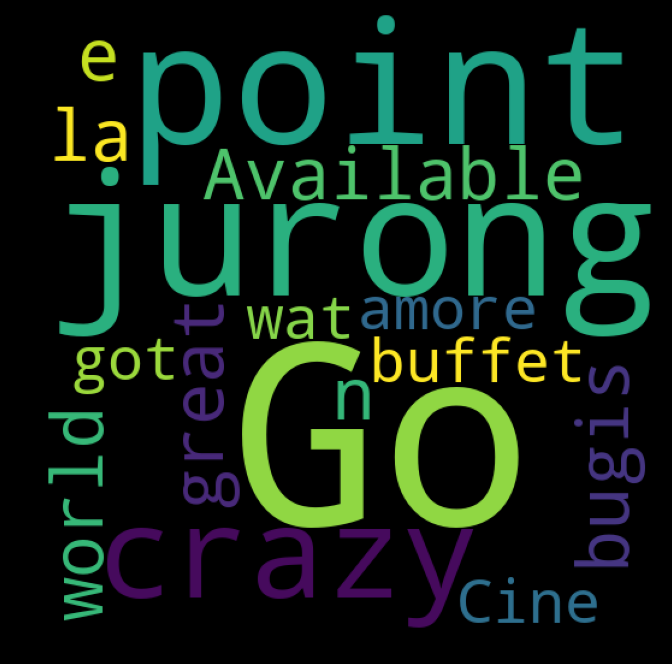

In [43]:
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(mail_word_cloud)